<a href="https://colab.research.google.com/github/PraeJi/Handwritten_recognition/blob/main/handwritten_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Thai-digit handwritten classification with Pytorch**

# Download and clean the dataset from the repository

In [ ]:
!git clone https://github.com/biodatlab/deep-learning-skooldio.git

Cloning into 'deep-learning-skooldio'...
remote: Enumerating objects: 2064, done.
remote: Counting objects: 100% (358/358), done.
remote: Compressing objects: 100% (223/223), done.
remote: Total 2064 (delta 194), reused 253 (delta 129), pack-reused 1706 (from 1)
Receiving objects: 100% (2064/2064), 17.11 MiB | 20.91 MiB/s, done.
Resolving deltas: 100% (205/205), done.


In [ ]:
!pip install pathlib2

In [ ]:
import os # ทำงานเกี่ยวกับ operating system เช่น การ list file, join file เป็นต้น
import os.path as op # ใช้สำหรับการดำเนินการที่เกี่ยวข้องกับเส้นทาง
import shutil # ทำงานเกี่ยวกับการ copy file
from glob import glob # ทำการ list file ต่างๆ ที่อยู่ใน folder
import pathlib2 as pathlib # ทำการดู directory ของ file และดึง parent folder หรือข้อมูลตัวเลขได้
from tqdm import tqdm # ใช้ในการ track ว่าเรารันไปถึงไหนแล้ว

In [ ]:
directory = "deep-learning-skooldio/"
paths = glob(op.join(directory, "thai-handwritten-dataset", "*","*"))

In [ ]:
len(paths)

1750

In [ ]:
# use Counter from collections to count the number, use Pathlib to get the parent folder name

from collections import Counter
Counter([pathlib.Path(p).parent.name for p in paths])

Counter({'3': 175,
         '8': 175,
         '4': 175,
         '1': 175,
         '6': 175,
         '2': 175,
         '7': 175,
         '0': 175,
         '5': 175,
         '9': 175})

3


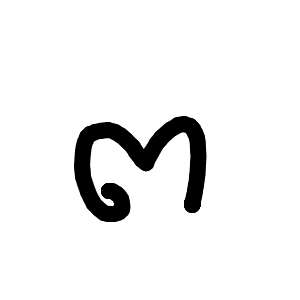

In [ ]:
# Use Pillow's Image to read and open one file

from PIL import Image

idx = 40
print(pathlib.Path(paths[idx]).parent.name)
Image.open(paths[idx])

In [ ]:
# Use train_test_split to split image into 90% training and 10% validation

from sklearn.model_selection import train_test_split

train_path, validation_path = train_test_split(paths, test_size=0.1, random_state=42) # random_state เพื่อให้ครั้งหน้าแบ่ง train กับ valid เหมือนเดิม

In [ ]:
len(train_path), len(validation_path)

(1575, 175)

In [ ]:
# สร้าง folder ใหม่ เพื่อ copy เก็บชุดข้อมูลที่แบ่งแล้วไว้ใน folder ใหม่

for i in range(10):
  os.makedirs(f"data/train/{i}", exist_ok=True)
  os.makedirs(f"data/validation/{i}", exist_ok=True)

In [ ]:
# Copy path to new directory

def copy_to_destination(src_paths, dst_path):
  """
  copy list of src_paths to destination path (dst_path)
  """
  for path in tqdm(src_paths):
    path = pathlib.Path(path)
    parent_dir = path.parent.name
    shutil.copy(path, op.join(dst_path, parent_dir, path.name))

In [ ]:
copy_to_destination(train_path, "data/train/")
copy_to_destination(validation_path, "data/validation/")

100%|██████████| 175/175 [00:00<00:00, 8449.74it/s]


In [ ]:
len(glob("data/train/*/*")), len(glob("data/validation/*/*"))

(1575, 175)

# Create a custom dataset and a dataloader

We need 3 functions when creating a Dataset including
-  __init__ (typically contains input data and transform),
-  __len__ (length of the dataset),
-  __getitem__ (input index then return pair of input and label or input)

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt

In [ ]:
# Create image transform
resize_transform = transforms.Resize((28,28))
grayscale_transform = transforms.Grayscale()
tensor_transform = transforms.ToTensor() # ปรับ pixel จาก 0-255 ให้เป็น 0-1 (Normallize)

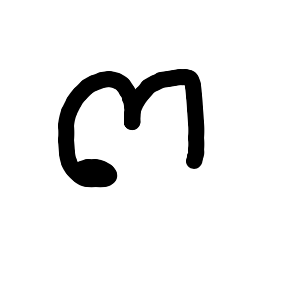

In [ ]:
img = Image.open(paths[100])
img

In [ ]:
resize_transform(img)

In [ ]:
img_tensor = tensor_transform(grayscale_transform(resize_transform(img))) # สามารถ transform พร้อมกันได้
img_tensor

tensor([[[1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
          1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
          1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
          1.0000, 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
          1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
          1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
          1.0000, 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
          1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
          1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
          1.0000, 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
          1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
          1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,

In [ ]:
img_tensor.shape # 1 คือ batch size หมายถึง มี 1 ภาพ, 28 x 28 คือ width, hieght

torch.Size([1, 28, 28])

In [ ]:
# รวม Trasform
transform = transforms.Compose([
  transforms.Resize((28,28)),
  transforms.Grayscale(),
  transforms.ToTensor(),
])

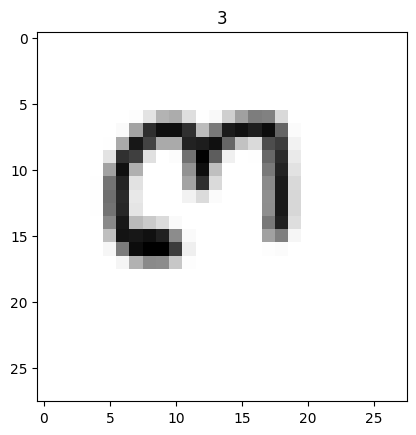

In [ ]:
# Show image transform
img_t = transform(img).squeeze(0) # ต้องลบ dimention แรกออกก่อน (batch size) ถึงจะ plot image ได้
plt.imshow(img_t, cmap="gray")
plt.title(pathlib.Path(paths[100]).parent.name)
plt.show()

In [ ]:
print(img_t.shape)
img_t

# 1 คือ pixel ที่มีสีขาว, 0 คือ pixel ที่มีสีดำ
# โดยปกติจะส่ง pixel ที่สนใจเป็นเลข 1 และ background เป็นเลข 0 โดยนำ 1 - img_t

torch.Size([28, 28])


tensor([[1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000

In [ ]:
1 - img_t # จะได้ pixel ที่สนใจเป็นตัวเลข และ background เป็น 0

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

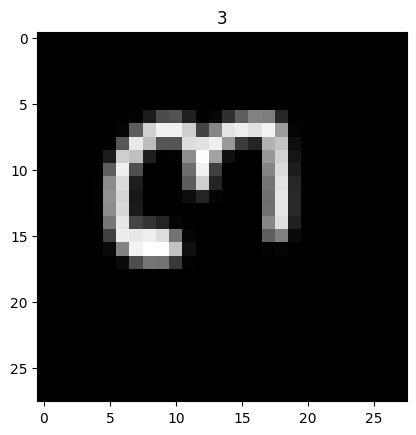

In [ ]:
img_t = 1 - transform(img).squeeze(0) # นำ 1 ลบแต่ละ pixel จะได้ background สีดำ
plt.imshow(img_t, cmap="gray")
plt.title(pathlib.Path(paths[100]).parent.name)
plt.show()

In [ ]:
class ThaiDigitDataset(Dataset):
  def __init__(self, img_dir: str, transform=None):
    # Input img_dir, create a relationship between image path and label

    self.img_dir = img_dir
    self.transform = transform
    self.img_labels = [(p, pathlib.Path(p).parent.name) for p in glob(op.join(img_dir, "*","*"))]


  def __len__(self):
    return len(self.img_labels)

  def __getitem__(self, idx):
    image_path, label = self.img_labels[idx]
    label = int(label)
    image = Image.open(image_path)
    if self.transform is not None:
      image = 1 - self.transform(image)
    return image, label

In [ ]:
# Create a Dataset and DataLoader
train_thaidigit_dataset = ThaiDigitDataset("data/train/", transform=transform)
val_thaidigit_dataset = ThaiDigitDataset("data/validation/", transform=transform)

In [ ]:
train_thaidigit_dataset.img_labels # ดูความสัมพันธ์ path กับ output หรือ label

[('data/train/3/a2b6edc8-2373-4854-a66c-da5928171610.png', '3'),
 ('data/train/3/26_3ee523f0-f687-4b31-84d4-d499c8241f83.png', '3'),
 ('data/train/3/fa382ab8-209c-46dd-881c-d46c605cf905.png', '3'),
 ('data/train/3/b6b40844-50cc-4847-8b83-9961b3bf7b2a.png', '3'),
 ('data/train/3/49a4314b-68e4-443a-85cb-6f8c30f5143a.png', '3'),
 ('data/train/3/cdd62ceb-15e0-4c75-bbc2-83852a658959.png', '3'),
 ('data/train/3/25_68b67e04-51ee-4db5-8b11-fc70965e5ed2.png', '3'),
 ('data/train/3/37488f3e-6944-4a2a-99dd-43c790183c80.png', '3'),
 ('data/train/3/31_c052c230-4af1-45b6-9177-d7758fb2ff6b.png', '3'),
 ('data/train/3/21_333cdee9-234a-46da-83d9-8cbb12965a2d.png', '3'),
 ('data/train/3/c7d9e3cd-ff4f-4fe8-9525-351a3ffd6b8e.png', '3'),
 ('data/train/3/30_19d391bc-519e-4c2d-9389-1a3e2cc3f1ad.png', '3'),
 ('data/train/3/206aed63-05a8-4105-b9b1-7cbf70557783.png', '3'),
 ('data/train/3/ce169337-9ad4-423b-b185-eaf502169cc1.png', '3'),
 ('data/train/3/ca6f8a66-1c4d-4d4d-bf3e-c03d9e5da610.png', '3'),
 ('data/tr

In [ ]:
train_thaidigit_dataset[10]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0941, 0.3569,
           0.5176, 0.5176, 0.2706, 0.0196, 

In [ ]:
Train_loader = DataLoader(train_thaidigit_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_thaidigit_dataset, batch_size=16, shuffle=False) # shuffle=False เพราะต้องการข้อมูลที่ตรงกับ order ที่อ่านมา

In [ ]:
# Use `next(iter(data_loader))` to load an example batch

images, labels = next(iter(Train_loader))

In [ ]:
# Check the shape of the batch

images.shape, labels.shape

# batch size, dept, weight, height

(torch.Size([16, 1, 28, 28]), torch.Size([16]))

# Create the model

In [ ]:
images.view(-1,28*28).shape

torch.Size([16, 784])

In [ ]:
import torch.nn as nn
import torch.nn.functional as F # ใช้สร้าง non-linear layer

class ThaiDigitNet(nn.Module):
  def __init__(self):
    super(ThaiDigitNet, self).__init__()
    # Create Linear (Dense) Neural Network Layers
    self.fc1 = nn.Linear(28*28,100)
    self.fc2 = nn.Linear(100,10) # 10 คือ ความน่าจะเป็นของเลข 10 ตัว (จำนวน class)

  def forward(self, x):
    # Write a forward pass
    x = x.view(-1, 28*28) # flatten (-1 คือ กำหนดให้ dimention แรกเท่าเดิม ส่วน dimention อื่นยืดออกไป)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    return x

In [ ]:
net = ThaiDigitNet()

In [ ]:
pred = net(images)

In [ ]:
pred.shape

torch.Size([16, 10])

In [ ]:
pred

tensor([[ 0.1581, -0.0148,  0.0209, -0.0235, -0.0563, -0.0466, -0.0530,  0.0486,
          0.0093,  0.0864],
        [ 0.1486, -0.0845,  0.0492,  0.0151, -0.0411, -0.0501, -0.0268, -0.0059,
          0.0135,  0.0063],
        [ 0.0409,  0.0184,  0.0517, -0.0248, -0.0019, -0.0908, -0.0644,  0.0446,
          0.0326,  0.0019],
        [ 0.1381, -0.0132,  0.1131, -0.0178, -0.0462, -0.0372, -0.0586,  0.0440,
          0.0292, -0.0202],
        [ 0.0658, -0.0791,  0.0446,  0.0375, -0.0243, -0.0540, -0.0420,  0.0684,
          0.0284,  0.0110],
        [ 0.0869, -0.0392, -0.0101,  0.0080, -0.0907, -0.0845, -0.0365, -0.0315,
          0.0261,  0.0063],
        [ 0.1741, -0.0493,  0.0179, -0.0460, -0.0978,  0.0017, -0.1329,  0.0175,
          0.0580, -0.0253],
        [ 0.1426, -0.0796,  0.0362, -0.0594, -0.0382, -0.0120, -0.1317, -0.0134,
          0.0672,  0.0082],
        [ 0.0216,  0.0308,  0.0400, -0.0462, -0.0189, -0.0501, -0.1915, -0.0347,
          0.0405,  0.0208],
        [ 0.1690, -

In [ ]:
# Predict the digit from the model before training (the result should not be good yet since the model is not trained)
print(pred.argmax(dim=1))
print(labels)

tensor([0, 0, 2, 0, 7, 0, 0, 0, 8, 0, 0, 8, 7, 0, 0, 0])
tensor([7, 5, 9, 1, 9, 9, 6, 7, 2, 3, 6, 5, 6, 6, 6, 4])


# Train the model

- sample คือ ข้อมูล 1 แถวในชุดข้อมูล
- batch คือ ข้อมูลที่ดึงมาจาก dataloader มีขนาดเท่ากับ batch size ที่เรากำหนด
- epoch คือ การ loop ข้อมูลทั้งหมดใน dataset
- training step คือ 1 step คือ การนำ batch ของข้อมูล มาเข้า nn เพื่ออัปเดตโมเดล
- For Example
  - sample (dataset) = 1575 images
  - batch size = 16 images
  - 1 epoch = 98 iterations (or training step)
    (Iterations = 1575/16=98)

In [ ]:
# Create cross entropy loss function, SGD optimizer, and its learning rate
loss_fn = nn.CrossEntropyLoss() # CrossEntropy จะนำผล predict คำนวน softmax แล้วเทียบผลกับ output
optimizer = torch.optim.SGD(net.parameters(), lr=0.01) # ใช้ในการอัปเดตโมเดล parameter # learning rate ความเร็วในการอัปเดต parameter

In [ ]:
# Single pass model and calculate loss (ทดลองกับ dataset batch เดียว)
images, labels = next(iter(Train_loader))
pred = net(images)
loss = loss_fn(pred, labels)

# อัปเดตโมเดล
optimizer.zero_grad() # ปรับ gradien เป็น 0 เพื่อคำนวนรอบใหม่
loss.backward() # จะบอกให้ nn คำนวน gradien ว่า parameter ควรอัปเดตไปในทิศทางไหน
optimizer.step() # จะทำการอัปเดตโมเดล parameter ด้วย learning rate ที่เรากำหนด

In [ ]:
loss

tensor(2.2989, grad_fn=<NllLossBackward0>)

In [ ]:
# ทดลองใส่ข้อมูลทั้ง train_loader เข้าไปใน model
# ถ้าอยากทราบว่า 1 epoch มีกี่ iteration ให้ใช้ enumerate
for i, (images, labels) in enumerate(Train_loader):
  pred = net(images)
  loss = loss_fn(pred, labels)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In [ ]:
loss

tensor(2.2376, grad_fn=<NllLossBackward0>)

In [ ]:
i

98

In [ ]:
loss.item() # ใช้ .item() เพื่อเปลี่ยนจาก tensor เป็นตัวเลข

2.237602472305298

In [ ]:
'''# รันหลาย epoch

n_epochs = 50
update_steps = 50

for epoch in range(n_epochs):
  net.train() # set ไว้ให้รู้ว่าเป็น train mode
  for batch_idx, (images, labels) in enumerate(Train_loader):
    pred = net(images)
    loss = loss_fn(pred, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch_idx % update_steps == 0:
      print(f"Epoch: {epoch}, # {batch_idx * len(images)}, Loss: {loss.item()}")

  # Write a validation loop เป็นการเช็ค performent กับ dataset ที่ไม่เคยเห็น
  # Print the validation loss and accuracy every epoch

  net.eval() # set ไว้ให้รู้ว่าเป็น validation mode
  val_loss, correct = 0, 0
  n_val = len(val_loader.dataset)
  for images, labels in val_loader:
    pred = net(images)
    val_loss += loss_fn(pred, labels).item()
    correct += (pred.argmax(dim=1) == labels).float().sum().item()
  print(f"Validation loss: {val_loss/n_val}, Validation accuracy: {correct/n_val}")'''

'# รันหลาย epoch\n\nn_epochs = 50\nupdate_steps = 50\n\nfor epoch in range(n_epochs):\n  net.train() # set ไว้ให้รู้ว่าเป็น train mode\n  for batch_idx, (images, labels) in enumerate(Train_loader):\n    pred = net(images)\n    loss = loss_fn(pred, labels)\n\n    optimizer.zero_grad()\n    loss.backward()\n    optimizer.step()\n\n    if batch_idx % update_steps == 0:\n      print(f"Epoch: {epoch}, # {batch_idx * len(images)}, Loss: {loss.item()}")\n\n  # Write a validation loop เป็นการเช็ค performent กับ dataset ที่ไม่เคยเห็น\n  # Print the validation loss and accuracy every epoch\n\n  net.eval() # set ไว้ให้รู้ว่าเป็น validation mode\n  val_loss, correct = 0, 0\n  n_val = len(val_loader.dataset)\n  for images, labels in val_loader:\n    pred = net(images)\n    val_loss += loss_fn(pred, labels).item()\n    correct += (pred.argmax(dim=1) == labels).float().sum().item()\n  print(f"Validation loss: {val_loss/n_val}, Validation accuracy: {correct/n_val}")'

In [ ]:
# Clean Code ด้วยการสร้างฟังก์ชัน Train

def Train(model, n_epochs, loss_function, optimizer, train_loader, validation_loader):
  training_logs = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}
  print("-"*80)
  for epoch in range(1, n_epochs+1):

    # Training
    model.train()
    train_loss, correct = 0, 0
    for images, labels in train_loader:
      pred = model(images)
      loss = loss_function(pred, labels)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      train_loss += loss.item()
      correct += (pred.argmax(1) == labels).float().sum().item()

    # Save training logs
    training_logs["train_loss"].append(train_loss/len(train_loader))
    training_logs["train_acc"].append(correct/len(train_loader.dataset))

    # Validation
    model.eval()
    val_loss, correct = 0,0
    for images, labels in validation_loader:
      pred = model(images)
      val_loss += loss_function(pred, labels).item()
      correct += (pred.argmax(1) == labels).float().sum().item()

    # Save validation logs
    training_logs["val_loss"].append(val_loss/len(val_loader))
    training_logs["val_acc"].append(correct/len(val_loader.dataset))

    print(f"Epochs {epoch}".ljust(10),
          f"train loss {training_logs['train_loss'][-1]:.5f}",
          f"train acc {training_logs['train_acc'][-1]:.5f}",

          f"val loss {training_logs['val_loss'][-1]:.5f}",
          f"val acc {training_logs['val_acc'][-1]:.5f}",
          )
    print("-"*80)
  return model, training_logs

In [ ]:
n_epochs = 100
net = ThaiDigitNet()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(),lr=0.01)
net, net_history = Train(net, n_epochs, loss_fn, optimizer, Train_loader, val_loader)

--------------------------------------------------------------------------------
Epochs 1   train loss 2.28743 train acc 0.15429 val loss 2.26624 val acc 0.21143
--------------------------------------------------------------------------------
Epochs 2   train loss 2.24767 train acc 0.25270 val loss 2.22762 val acc 0.30857
--------------------------------------------------------------------------------
Epochs 3   train loss 2.19751 train acc 0.32571 val loss 2.17441 val acc 0.34857
--------------------------------------------------------------------------------
Epochs 4   train loss 2.13210 train acc 0.37524 val loss 2.10679 val acc 0.36000
--------------------------------------------------------------------------------
Epochs 5   train loss 2.05436 train acc 0.38984 val loss 2.02584 val acc 0.46286
--------------------------------------------------------------------------------
Epochs 6   train loss 1.96510 train acc 0.46222 val loss 1.93643 val acc 0.48000
----------------------------

In [ ]:
def plot_graph(history):
  fig, (ax1,ax2) = plt.subplots(1,2)
  fig.set_figwidth(10)
  fig.suptitle("Train vs Validation")
  ax1.plot(history["train_acc"], label="Train")
  ax1.plot(history["val_acc"], label="Validation")
  ax1.legend()
  ax1.set_title("Accuracy")

  ax2.plot(history["train_loss"], label="Train")
  ax2.plot(history["val_loss"], label="Validation")
  ax2.legend()
  ax2.set_title("Loss")
  fig.show()

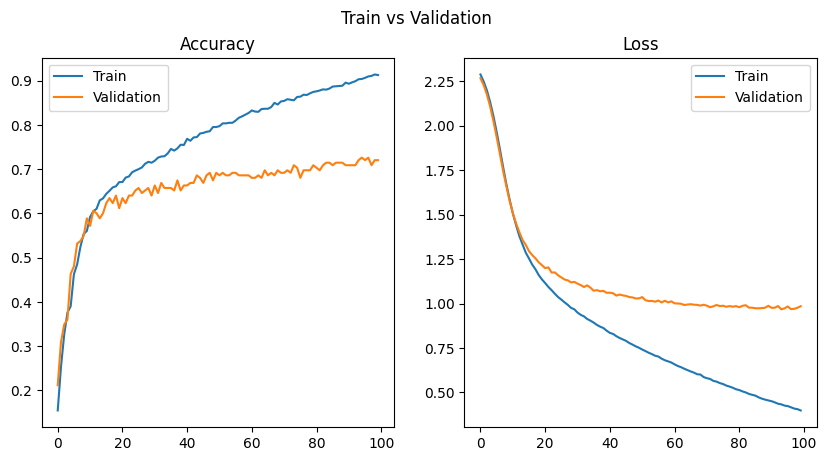

In [ ]:
plot_graph(net_history)

สังเกตุกราฟ: validation เกิด overfit ที่ epoch ประมาณ 50

In [ ]:
'''print(pred.argmax(dim=1))
print(labels)'''

'print(pred.argmax(dim=1))\nprint(labels)'

# Evaluate the model

In [ ]:
import pathlib as pathlib

In [ ]:
import pandas as pd

# Create evaluation function for the model
def evaluate(val_dir, model):
  model.eval()
  paths = glob(op.join(val_dir,"*","*"))
  predictions = []
  for idx, path in enumerate(paths):
    img = 1 - transform(Image.open(path))
    pred = model(img)
    predictions.append({
        "path": path,
        "prediction": int(pred.argmax(dim=1).item()),
        "label": int(pathlib.Path(path).parent.name)
    })

  results = pd.DataFrame(predictions)

  # Calculate accuracy
  accuracy = (results.prediction == results.label).sum()/len(results)
  print(f"Accuracy: {accuracy * 100:.2f}%")

  return results

In [ ]:
pred_df = evaluate("data/validation/", net)
pred_df

Accuracy: 72.00%


,path,prediction,label
0,data/validation/3/24_69799b34-de22-4866-b1cd-d...,3,3
1,data/validation/3/34_5eb5bc4c-64ba-4d53-bc21-c...,3,3
2,data/validation/3/21fc8e57-6097-497e-aa62-50d1...,1,3
3,data/validation/3/84a8ff60-7740-41f3-a594-f4d0...,3,3
4,data/validation/3/0f14b574-daf6-4a22-ae06-86ea...,9,3
...,...,...,...
170,data/validation/9/0a51150d-0afd-455e-9782-9141...,9,9
171,data/validation/9/53c9ac1f-6e18-46e8-97b2-ea5d...,9,9
172,data/validation/9/2c35dfca-6982-4b27-8328-09f7...,9,9
173,data/validation/9/27_446dc181-636f-457b-b124-1...,5,9


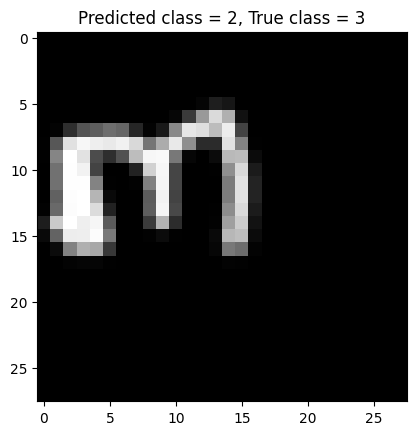

In [ ]:
# Show some random image with their predicted number

sample_path = glob("data/validation/*/*")[10]
img = Image.open(sample_path)
img = (1 - transform(img)).squeeze(0)
pred = net(img)
pred = int(pred.argmax(dim=1))
true_class = pathlib.Path(sample_path).parent.name

plt.title("Predicted class = {}, True class = {}".format(pred, true_class))
plt.imshow(img, cmap="gray")
plt.show()

# Save model

In [ ]:
net.state_dict()

OrderedDict([('fc1.weight',
              tensor([[ 0.0123, -0.0291,  0.0216,  ..., -0.0060,  0.0202, -0.0241],
                      [ 0.0179,  0.0164, -0.0379,  ..., -0.0301, -0.0081, -0.0292],
                      [ 0.0191, -0.0267,  0.0078,  ..., -0.0180,  0.0327,  0.0081],
                      ...,
                      [-0.0147,  0.0093,  0.0209,  ...,  0.0299,  0.0332,  0.0236],
                      [-0.0015, -0.0245, -0.0056,  ...,  0.0388, -0.0090,  0.0315],
                      [-0.0308,  0.0034,  0.0213,  ...,  0.0055, -0.0284, -0.0198]])),
             ('fc1.bias',
              tensor([ 0.1026,  0.0107, -0.0541,  0.0141,  0.1318,  0.0518, -0.1781,  0.5023,
                       0.0826,  0.0602,  0.0648, -0.0988, -0.3369,  0.0492, -0.0089,  0.0711,
                      -0.2129, -0.0759,  0.0398, -0.2782,  0.0244, -0.0827, -0.1896, -0.0134,
                       0.0072, -0.3358,  0.0307, -0.0023,  0.1444,  0.0220,  0.1929,  0.0886,
                       0.0418, -0.35

In [ ]:
net.state_dict()["fc1.weight"].shape, net.state_dict()["fc1.bias"].shape

(torch.Size([100, 784]), torch.Size([100]))

In [ ]:
save_path = "thai_digit.pth"
torch.save(net.state_dict(), save_path)

# Load trained model and predict on a sample image

In [ ]:
import torch
from pathlib import Path
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.Grayscale(),
    transforms.ToTensor()
])

class ThaiDigitNet(nn.Module):
    def __init__(self):
        super(ThaiDigitNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
# Create model instance, upload trained weight to Colab, and load trained model parameters from ``thai_digit_net.pth``

model = ThaiDigitNet()
model.load_state_dict(torch.load("thai_digit.pth"))

<ipython-input-61-f2ef11900a52>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("thai_digit.pth"))


<All keys matched successfully>

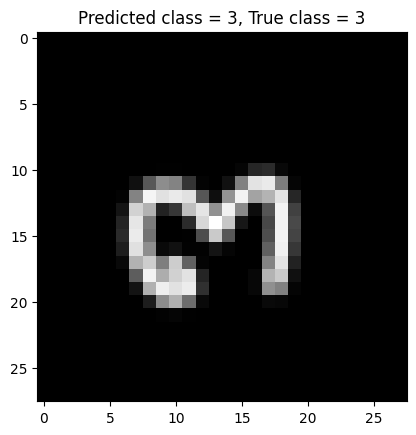

In [ ]:
from glob import glob

sample_path = glob("deep-learning-skooldio/thai-handwritten-dataset/*/*.png")[40]
img = Image.open(sample_path)
y_true = Path(sample_path).parent.name

img = 1 - transform(img)
y_pred = model(img)
y_pred = y_pred.argmax(dim=1)

plt.title("Predicted class = {}, True class = {}".format(y_pred.item(), y_true))
plt.imshow(img.squeeze(0), cmap="gray")
plt.show()

# Train neural network model with more layers

In [ ]:
# Create neural network with more layers

class ThaiDigitMoreLayers(nn.Module):
  def __init__(self):
    super(ThaiDigitMoreLayers, self).__init__()
    # Create layers
    self.fc1 = nn.Linear(28*28, 392)
    self.fc2 = nn.Linear(392, 196)
    self.fc3 = nn.Linear(196, 98)
    self.fc4 = nn.Linear(98, 10)

  def forward(self, x):
    # forward pass
    x = x.view(-1, 28*28)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.fc3(x)
    x = F.relu(x)
    x = self.fc4(x)
    return x

In [ ]:
n_epoch = 100
more_layers_model = ThaiDigitMoreLayers()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(more_layers_model.parameters(), lr=0.01)

more_layers_model, more_layers_model_history = Train(
    more_layers_model, n_epoch, loss_fn, optimizer, Train_loader, val_loader
)

--------------------------------------------------------------------------------
Epochs 1   train loss 2.30470 train acc 0.09714 val loss 2.29891 val acc 0.18286
--------------------------------------------------------------------------------
Epochs 2   train loss 2.30294 train acc 0.12698 val loss 2.29849 val acc 0.18286
--------------------------------------------------------------------------------
Epochs 3   train loss 2.30152 train acc 0.14349 val loss 2.29801 val acc 0.17143
--------------------------------------------------------------------------------
Epochs 4   train loss 2.29997 train acc 0.14603 val loss 2.29745 val acc 0.14286
--------------------------------------------------------------------------------
Epochs 5   train loss 2.29837 train acc 0.13397 val loss 2.29664 val acc 0.16571
--------------------------------------------------------------------------------
Epochs 6   train loss 2.29670 train acc 0.17397 val loss 2.29561 val acc 0.17714
----------------------------

In [ ]:
pred_df = evaluate("data/validation/", more_layers_model)
pred_df.head(5)

Accuracy: 81.71%


,path,prediction,label
0,data/validation/3/24_69799b34-de22-4866-b1cd-d...,3,3
1,data/validation/3/34_5eb5bc4c-64ba-4d53-bc21-c...,3,3
2,data/validation/3/21fc8e57-6097-497e-aa62-50d1...,3,3
3,data/validation/3/84a8ff60-7740-41f3-a594-f4d0...,3,3
4,data/validation/3/0f14b574-daf6-4a22-ae06-86ea...,7,3


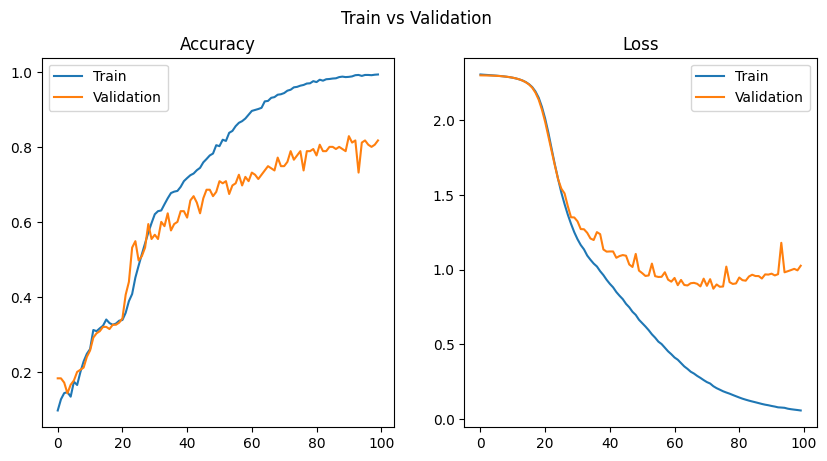

In [ ]:
plot_graph(more_layers_model_history)

# Regularization with Dropout

- Dropout เป็นการลดโอกาสการเกิด overfitting ที่เกิดจากโมเดล
- Dropout is one of the techniques used to prevent overfitting. Here, we can train the model for more epochs to observe the loss curve.

In [ ]:
class DropoutThaiDigit(nn.Module):
  def __init__(self):
    super(DropoutThaiDigit, self).__init__()
    # Create layers
    self.fc1 = nn.Linear(28*28, 392)
    self.fc2 = nn.Linear(392, 196)
    self.fc3 = nn.Linear(196, 98)
    self.fc4 = nn.Linear(98, 10)
    self.dropout = nn.Dropout(p=0.1) # p คือ ค.น่าจะเป็นที่เราจะ drop activation layer ระหว่างเทรนโมเดล

  def forward(self, x):
    # forward pass
    x = x.view(-1, 28*28)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.dropout(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.dropout(x)
    x = self.fc3(x)
    x = F.relu(x)
    x = self.dropout(x)
    x = self.fc4(x)
    return x

In [ ]:
n_epoch = 100
drop_model = DropoutThaiDigit()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(drop_model.parameters(), lr=0.01)

dropout_model, dropout_model_history = Train(
    drop_model, n_epoch, loss_fn, optimizer, Train_loader, val_loader
)

--------------------------------------------------------------------------------
Epochs 1   train loss 2.30394 train acc 0.10921 val loss 2.30209 val acc 0.09714
--------------------------------------------------------------------------------
Epochs 2   train loss 2.30280 train acc 0.10857 val loss 2.30136 val acc 0.09714
--------------------------------------------------------------------------------
Epochs 3   train loss 2.30117 train acc 0.12063 val loss 2.30034 val acc 0.10286
--------------------------------------------------------------------------------
Epochs 4   train loss 2.29992 train acc 0.12444 val loss 2.29940 val acc 0.10286
--------------------------------------------------------------------------------
Epochs 5   train loss 2.29799 train acc 0.13397 val loss 2.29827 val acc 0.13714
--------------------------------------------------------------------------------
Epochs 6   train loss 2.29623 train acc 0.14794 val loss 2.29689 val acc 0.16571
----------------------------

In [ ]:
pred_df = evaluate("data/validation/", dropout_model)
pred_df.head(5)

Accuracy: 74.29%


,path,prediction,label
0,data/validation/3/24_69799b34-de22-4866-b1cd-d...,3,3
1,data/validation/3/34_5eb5bc4c-64ba-4d53-bc21-c...,3,3
2,data/validation/3/21fc8e57-6097-497e-aa62-50d1...,3,3
3,data/validation/3/84a8ff60-7740-41f3-a594-f4d0...,3,3
4,data/validation/3/0f14b574-daf6-4a22-ae06-86ea...,9,3


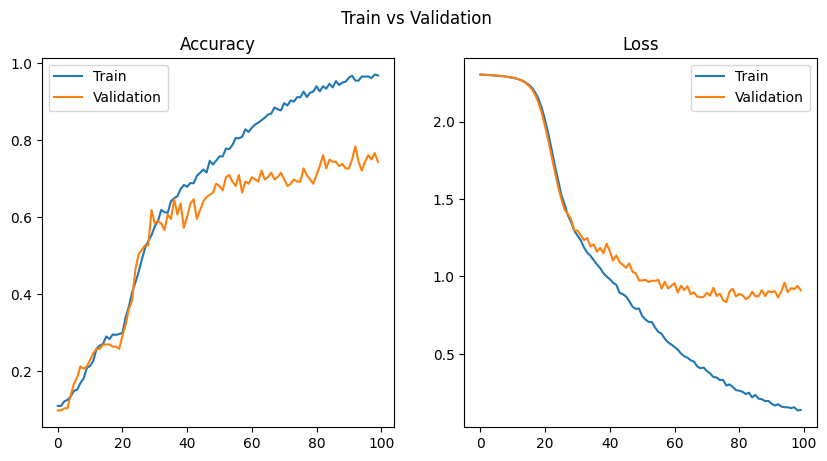

In [ ]:
plot_graph(dropout_model_history)

# Image Augmentation

Image augmentation is a technique used to artificially increase the size of a training dataset by creating modified versions of existing images.

- degrees เพื่อสุ่มให้ภาพหมุนไปทางซ้ายหรือขวาได้ตามจำนวนองศาที่กำหนด
- translate เพื่อสุ่มให้ภาพเลื่อนไปทางซ้ายหรือขวาด้วยสัดส่วนกำหนด โดย 0 คือไม่เลื่อนเลย
- scale เพื่อสุ่มให้ภาพขยายหรือซูมออกได้ตามสเกลที่กำหนด

In [ ]:
# Add image augmentation in `train_transform`

import torch
from pathlib import Path
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

train_transform = transforms.Compose([
  transforms.Resize((28,28)),
  transforms.Grayscale(),

  # add RandomAffine transform
  transforms.RandomAffine(degrees=(-10,10), translate=(0.0,0.1), scale=(1,1)), # degree เป็นการสุ่มหมุนภาพ, translate เป็นการสุ่มการเลื่อนภาพ (0.0,0.1 คือมีโอกาสเลื่อนภาพไปซ้ายหรือขวา 10%), scale คือการซูมภาพ (1,1 คือไม่ซูม)

  transforms.ToTensor(),
])

val_transform = transforms.Compose([
  transforms.Resize((28,28)),
  transforms.Grayscale(),
  transforms.ToTensor(),
])

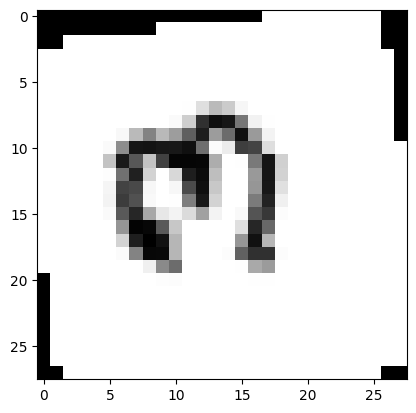

In [ ]:
path = glob("deep-learning-skooldio/thai-handwritten-dataset/*/*")[30]
img = Image.open(path)

# Transform image using `train_transform`
transformed_img =  train_transform(img).squeeze(0)

plt.imshow(transformed_img, cmap="gray")
plt.show()

In [ ]:
import os
from glob import glob
from torch.utils.data import Dataset

In [ ]:
# สร้าง dataset ที่ทำการ transforms

train_thaidigit_dataset = ThaiDigitDataset("data/train/", transform=train_transform)
val_thaidigit_dataset = ThaiDigitDataset("data/validation/", transform=val_transform)

In [ ]:
# สร้าง dataloader ของ dataset ที่ทำการ transforms แล้ว

train_dataloader = DataLoader(train_thaidigit_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_thaidigit_dataset, batch_size=16, shuffle=False)

In [ ]:
# Train the model with augmented data

n_epoch = 150
augmented_model = DropoutThaiDigit()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(augmented_model.parameters(), lr=0.01)

augmented_model, augmented_model_history = Train(
    augmented_model, n_epoch, loss_fn, optimizer, train_dataloader, val_dataloader
)

--------------------------------------------------------------------------------
Epochs 1   train loss 2.30459 train acc 0.09587 val loss 2.29967 val acc 0.12000
--------------------------------------------------------------------------------
Epochs 2   train loss 2.30294 train acc 0.09016 val loss 2.29963 val acc 0.08571
--------------------------------------------------------------------------------
Epochs 3   train loss 2.30232 train acc 0.09841 val loss 2.29952 val acc 0.09714
--------------------------------------------------------------------------------
Epochs 4   train loss 2.30137 train acc 0.10159 val loss 2.29919 val acc 0.09714
--------------------------------------------------------------------------------
Epochs 5   train loss 2.30035 train acc 0.10349 val loss 2.29877 val acc 0.09714
--------------------------------------------------------------------------------
Epochs 6   train loss 2.29898 train acc 0.10667 val loss 2.29833 val acc 0.09714
----------------------------

In [ ]:
pred_df = evaluate("data/validation/", augmented_model)
pred_df.head(5)

Accuracy: 82.29%


,path,prediction,label
0,data/validation/3/24_69799b34-de22-4866-b1cd-d...,3,3
1,data/validation/3/34_5eb5bc4c-64ba-4d53-bc21-c...,3,3
2,data/validation/3/21fc8e57-6097-497e-aa62-50d1...,3,3
3,data/validation/3/84a8ff60-7740-41f3-a594-f4d0...,3,3
4,data/validation/3/0f14b574-daf6-4a22-ae06-86ea...,3,3


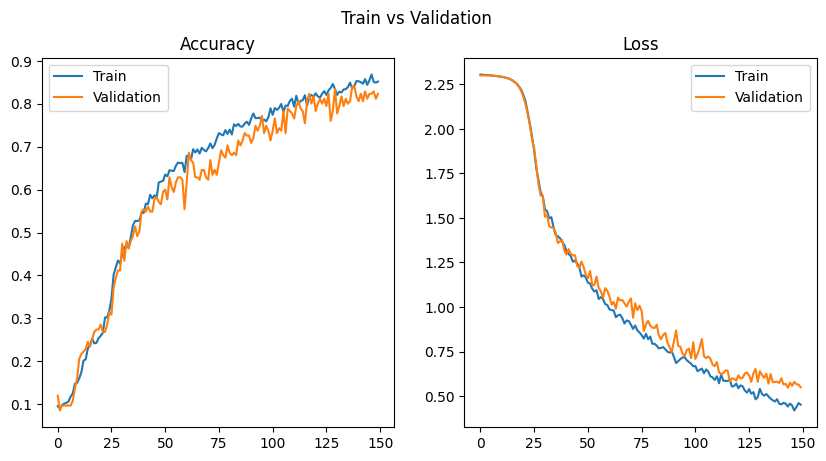

In [ ]:
plot_graph(augmented_model_history)

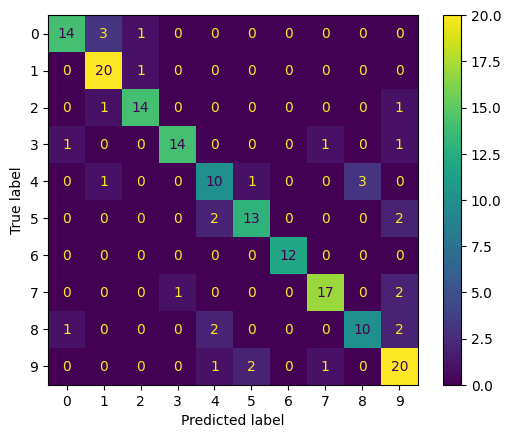

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(pred_df.label, pred_df.prediction, labels=range(10))
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
display.plot()
plt.show()

In [ ]:
augmented_model.state_dict()

OrderedDict([('fc1.weight',
              tensor([[ 0.0226, -0.0229, -0.0052,  ...,  0.0139, -0.0365, -0.0194],
                      [ 0.0031, -0.0065, -0.0289,  ..., -0.0160,  0.0366,  0.0030],
                      [-0.0551, -0.0105, -0.0317,  ...,  0.0289, -0.0176, -0.0270],
                      ...,
                      [ 0.0038, -0.0139,  0.0253,  ..., -0.0030,  0.0262, -0.0342],
                      [ 0.0171,  0.0222,  0.0269,  ..., -0.0030,  0.0003, -0.0111],
                      [ 0.0013,  0.0314,  0.0015,  ..., -0.0106, -0.0301,  0.0155]])),
             ('fc1.bias',
              tensor([-1.3793e-02, -5.6288e-03, -2.8544e-01, -8.8754e-02, -9.2669e-03,
                      -1.7493e-02, -4.5734e-02, -3.5851e-02, -8.0744e-02, -1.0149e-02,
                       3.0334e-02, -3.9352e-02,  1.5573e-02, -2.0315e-02,  2.9183e-02,
                      -1.6471e-01, -3.7680e-02, -1.1588e-01, -6.1266e-02,  1.2579e-01,
                       3.6574e-02, -3.6060e-02,  3.4987e-02,  4.

In [ ]:
augmented_model.state_dict()["fc1.weight"].shape, augmented_model.state_dict()["fc1.bias"].shape

(torch.Size([392, 784]), torch.Size([392]))

In [ ]:
save_path = "thai_digit_augmented.pth"
torch.save(augmented_model.state_dict(), save_path)

# GPU

In [ ]:
'''import torch'''

'import torch'

In [ ]:
'''torch.cuda.is_available()'''

'torch.cuda.is_available()'

In [ ]:
'''# check if CUDA is available, create device "cuda" or "cpu"

device = "cuda" if torch.cuda.is_available() else "cpu"
device'''

'# check if CUDA is available, create device "cuda" or "cpu"\n\ndevice = "cuda" if torch.cuda.is_available() else "cpu"\ndevice'

In [ ]:
'''!nvidia-smi'''

'!nvidia-smi'

In [ ]:
'''# Modify the train function to train with cuda
def train(model, n_epochs, loss_function, optimizer, train_loader, validation_loader):
    training_logs = {"train_loss": [],  "train_acc": [], "val_loss": [], "val_acc": []}
    print("-"*80)
    model.train()

    # move model to device
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)

    for epoch in range(1, n_epochs+1):
        # training
        train_loss, correct = 0, 0
        for images, labels in train_loader:
            # Change device to cuda!
            # Move the data to GPU
            images, labels = images.to(device), labels.to(device)

            pred = model(images)
            loss = loss_function(pred, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            correct += (pred.argmax(1) == labels).float().sum().item()
        # save training logs
        training_logs["train_loss"].append(train_loss/ len(train_loader))
        training_logs["train_acc"].append(correct / len(train_loader.dataset))

        # validation
        model.eval()
        val_loss, correct = 0, 0
        for images, labels in validation_loader:

            #!! Change device to cuda
            # Move the data to GPU
            images, labels = images.to(device), labels.to(device)

            pred = model(images)
            val_loss += loss_function(pred, labels).item()
            correct += (pred.argmax(1) == labels).float().sum().item()

        #!! Save best model
        # If training_logs["val_loss"] is not empty
        if len(training_logs["val_loss"]):
            # If the current validation loss is lower than the previous validation loss
            # So we save the model
            if min(training_logs["val_loss"]) > (val_loss/ len(validation_loader)):
                save_path = "thai_digit.pth"
                torch.save(model.state_dict(), save_path)  # save model parameters

        # save validation logs
        training_logs["val_loss"].append(val_loss/ len(validation_loader))
        training_logs["val_acc"].append(correct / len(validation_loader.dataset))

        print(f"Epochs {epoch}".ljust(10),
              f"train loss {training_logs['train_loss'][-1]:.5f}",
              f"train acc {training_logs['train_acc'][-1]:.5f}",

              f"val loss {training_logs['val_loss'][-1]:.5f}",
              f"val acc {training_logs['val_acc'][-1]:.5f}",
              )
        print("-"*80)
    return model, training_logs'''

'# Modify the train function to train with cuda\ndef train(model, n_epochs, loss_function, optimizer, train_loader, validation_loader):\n    training_logs = {"train_loss": [],  "train_acc": [], "val_loss": [], "val_acc": []}\n    print("-"*80)\n    model.train()\n\n    # move model to device\n    device = "cuda" if torch.cuda.is_available() else "cpu"\n    model.to(device)\n\n    for epoch in range(1, n_epochs+1):\n        # training\n        train_loss, correct = 0, 0\n        for images, labels in train_loader:\n            # Change device to cuda!\n            # Move the data to GPU\n            images, labels = images.to(device), labels.to(device)\n\n            pred = model(images)\n            loss = loss_function(pred, labels)\n\n            optimizer.zero_grad()\n            loss.backward()\n            optimizer.step()\n\n            train_loss += loss.item()\n            correct += (pred.argmax(1) == labels).float().sum().item()\n        # save training logs\n        training

In [ ]:
'''# evaluate function code from previous exercise
def evaluate(dataframe, model):
    model.eval()
    results = dataframe.copy()
    predictions = []
    for idx, row in results.iterrows():
        img = val_transform(Image.open(row.path))
        pred = model(1 - img)
        predictions.append(pred.argmax(1).item())

    results["prediction"] = predictions
    # Calculate accuracy
    accuracy = len(results[results.prediction == results.text]) / len(results)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    return results'''

'# evaluate function code from previous exercise\ndef evaluate(dataframe, model):\n    model.eval()\n    results = dataframe.copy()\n    predictions = []\n    for idx, row in results.iterrows():\n        img = val_transform(Image.open(row.path))\n        pred = model(1 - img)\n        predictions.append(pred.argmax(1).item())\n\n    results["prediction"] = predictions\n    # Calculate accuracy\n    accuracy = len(results[results.prediction == results.text]) / len(results)\n    print(f"Accuracy: {accuracy * 100:.2f}%")\n    return results'

In [ ]:
'''import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader'''

'import torch.nn as nn\nimport torch.nn.functional as F\nfrom torch.utils.data import Dataset, DataLoader'

In [ ]:
'''class DropoutThaiDigit(nn.Module):
    def __init__(self):
        super(DropoutThaiDigit, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(28*28, 392),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(392, 196),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(196, 98),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(98, 10),
        )

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        return self.layers(x)'''

'class DropoutThaiDigit(nn.Module):\n    def __init__(self):\n        super(DropoutThaiDigit, self).__init__()\n        self.layers = nn.Sequential(\n            nn.Linear(28*28, 392),\n            nn.ReLU(),\n            nn.Dropout(0.1),\n            nn.Linear(392, 196),\n            nn.ReLU(),\n            nn.Dropout(0.1),\n            nn.Linear(196, 98),\n            nn.ReLU(),\n            nn.Dropout(0.1),\n            nn.Linear(98, 10),\n        )\n\n    def forward(self, x):\n        x = x.view(-1, 28 * 28)\n        return self.layers(x)'

In [ ]:
'''n_epochs = 40
loss_fn = nn.CrossEntropyLoss()
model = DropoutThaiDigit()  # Initialize the model
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)'''

'n_epochs = 40\nloss_fn = nn.CrossEntropyLoss()\nmodel = DropoutThaiDigit()  # Initialize the model\noptimizer = torch.optim.SGD(model.parameters(), lr=0.01)'

# Create application for Thai handwritten recognition with Gradio

In [ ]:
! pip install gradio==3.35.0
! pip install torchvision

INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 

สร้าง Class ของโมเดลและโหลด weights ที่เทรนเข้าไปยังโมเดล ต้องระวังว่าไฟล์ของโมเดลที่เทรนแล้วกับจำนวนเลเยอร์ของโมเดลต้องมีขนาดตรงกัน ไม่เช่นนั้นอาจจะเกิด Errors ได้

In [ ]:
import numpy as np
import torch
from pathlib import Path
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
from torchvision import transforms
import gradio as gr

transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.Grayscale(),
    transforms.ToTensor()
])
labels = ["๐ (ศูนย์)", "๑ (หนึ่ง)", "๒ (สอง)", "๓ (สาม)", "๔ (สี่)", "๕ (ห้า)", "๖ (หก)", "๗ (เจ็ด)", "๘ (แปด)", "๙ (เก้า)"]
LABELS = {i:k for i, k in enumerate(labels)} # dictionary of index and label

# Load model
class DropoutThaiDigit(nn.Module):
  def __init__(self):
    super(DropoutThaiDigit, self).__init__()
    # Create layers
    self.fc1 = nn.Linear(28*28, 392)
    self.fc2 = nn.Linear(392, 196)
    self.fc3 = nn.Linear(196, 98)
    self.fc4 = nn.Linear(98, 10)
    self.dropout = nn.Dropout(p=0.1) # p คือ ค.น่าจะเป็นที่เราจะ drop activation layer ระหว่างเทรนโมเดล

  def forward(self, x):
    # forward pass
    x = x.view(-1, 28*28)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.dropout(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.dropout(x)
    x = self.fc3(x)
    x = F.relu(x)
    x = self.dropout(x)
    x = self.fc4(x)
    return x

model = DropoutThaiDigit()
model.load_state_dict(torch.load("thai_digit_augmented.pth"))
model.eval()

<ipython-input-96-97c93b956112>:45: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("thai_digit_augmented.pth"))


DropoutThaiDigit(
  (fc1): Linear(in_features=784, out_features=392, bias=True)
  (fc2): Linear(in_features=392, out_features=196, bias=True)
  (fc3): Linear(in_features=196, out_features=98, bias=True)
  (fc4): Linear(in_features=98, out_features=10, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

วิธีการเขียนคือเราจะนำภาพ img ใส่เข้าไปในโมเดลที่สร้างขึ้น และเปลี่ยนเป็นความน่าจะเป็นโดยใช้คำสั่ง softmax probs = model(img).softmax(dim=1).ravel() โดยโมเดลจะทำนายความน่าจะเป็นและตำแหน่ง (index) ออกมา หลังจากนั้นเราจะนำ index มาแปลงให้เป็นชื่อของตัวเลข เช่น ๐ (ศูนย์) แล้วนำทุกอย่างมารวมกันให้อยู่ใน format ของ dictionary {label0: prob0, label1: prob1, ...} ดังด้านล่าง

In [ ]:
def predict(img):
  """
  Predict function takes image and return top 5 predictions as a dictionary:
  {label: confidence, label: confidence, ...}
  """
  if img is None:
    return None

  img = transform(img) # do not need to use 1-transform(img) because gradio already do it
  probs = model(img).softmax(dim=1).ravel()
  probs, indices = torch.topk(probs,5) # select top 5
  probs, indices = probs.tolist(), indices.tolist() # transform to list
  confidences = {LABELS[i]: v for i, v in zip(indices, probs)}

  return confidences

ประกอบร่างทั้งหมดโดยใช้ gr.Interface ที่รับ

- ฟังก์ชั่น predict ที่รับภาพประเภท PIL และเปลี่ยนให้เป็น dictionary
- inputs รับ gr.Sketchpad ที่ทำให้ผู้ใช้งานสามารถทดลองวาดตัวเลขบน Sketch pad ได้
- outputs รับ gr.Label ที่เปลี่ยน dictionary ที่ได้ให้เป็นตารางของ label และความน่าจะเป็น (probability)
- title เป็นชื่อของแอพพลิเคชั่นที่จะแสดงด้านบนของแอพพลิเคชั่น
- ทั้งหมดต่อด้วย .launch(enable_queue=True) เพื่อสร้าง application ทดลองใช้งานบน Google Colab

In [ ]:
gr.Interface(
    fn = predict,
    inputs = gr.Sketchpad(label="Draw Here", brush_redius=5, type="pil",shape=(120,120)),
    outputs = gr.Label(label="Guess"),
    title = "Thai Digit Handwritten Classification",
    live = True
).launch(enable_queue=True)

/usr/local/lib/python3.10/dist-packages/gradio/templates.py:120: UserWarning: You have unused kwarg parameters in Sketchpad, please remove them: {'brush_redius': 5}
  super().__init__(


IMPORTANT: You are using gradio version 3.35.0, however version 4.44.1 is available, please upgrade.
--------
Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ef2fc67b2f58a728fa.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
